# 주성분 분석

In [1]:
import numpy as np

fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

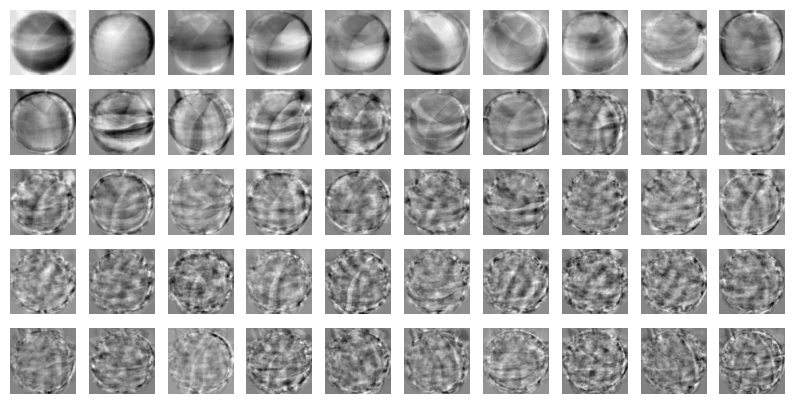

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

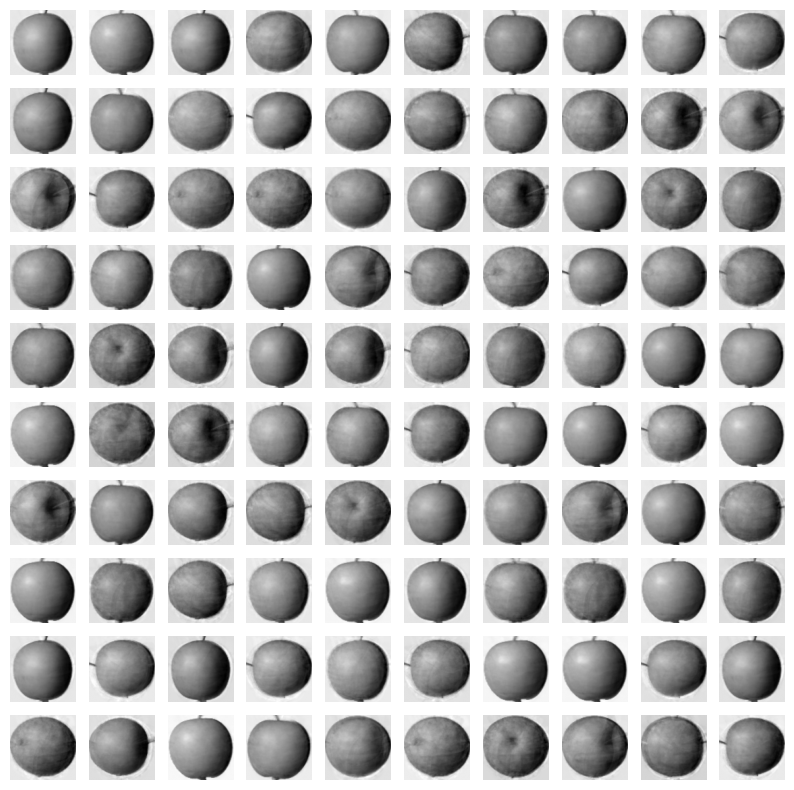

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

In [11]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9215778995744967)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.24755192, 0.19830251, 0.19532013, 0.16972136, 0.22623873]), 'score_time': array([0.00256443, 0.00256753, 0.00260305, 0.00247073, 0.00243139]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.00557351, 0.00745726, 0.00740027, 0.01488781, 0.01729298]), 'score_time': array([0.00049782, 0.0005033 , 0.00058007, 0.00082111, 0.00047016]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [19]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
pca.components_

array([[-9.24490195e-06, -5.10601298e-06, -8.91640398e-06, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.69701614e-05,  1.13551048e-05,  1.82152562e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]],
      shape=(2, 10000))

In [20]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [21]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

{'fit_time': array([0.13840842, 0.03577447, 0.03537822, 0.01028085, 0.02360129]),
 'score_time': array([0.00160909, 0.00058198, 0.00049305, 0.00046992, 0.0004847 ]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.98333333, 1.        ])}

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [28]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

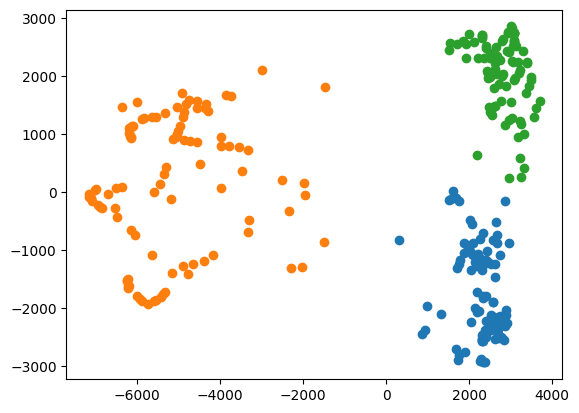

In [29]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])